# Udacity Reinforcement Learning: Navigation Project

## Introduction

This project focuses on solving a reinforcement learning problem of banana collector in unity as part of udacity deep reinforcement course . In the game agents move around an area attempting to collect as many rewarding bananas (yellow) as possible, while avoiding negatively rewarding bananas (purple). The objective of the project is to train an agent such that is maximizes reward (collects yellow banana while avoiding purple banana) leveraging information on the state (continous) and making discrete decisions (direction of movement). In this particular challenge there is only a single agent and the agent needs to learn to maximize rewards by selecting the directions it can move at each point in time.

The successful completion of the challenge is to defined as being able to train that agent that equals or exceeds the benchmark which is defined as average reward over the recent 100 episodes is >=13.0. The selection of the reinforcement learning technique and parameters leveraged in the model is left to the individual.

In this report we will start with details of the the problem description, our selected learning algorithm including hyper-parameters, results of the solution including plot of rewards and finally ideas for next steps.

## Problem Description

A key aspect in selection of appropriate approach for reinforcement learning problems is to understand the environment state space that can be observed and the action space.
For this challenge the agent can observe a state space with 37 dimensions that includes the agent's velocity and ray-based perception of objects around the agents forward direction. The actions that the agent can take are discrete including moving forward, backward, and turning left or right.

As we note from this the input state space is continous (e.g. velocity is a continous variable) this will require us to consider either approaches to discretize the space (e.g. using tile coding) or use function approximator that takes in continous input space and outputs the action and value. Given the relatively large number of variables in the input space (37 dimensions) I selected function approximator as a better approach to solve this  problem. Specifically I leveraged DQN model leveraging a function approximator to train the agent.

In order to improve the performance of the DQN model we further leveraged experience replay (to remove serial correlation between succesive decisions) and a target & local DQN model to reduce feedback loops between the target and estimated Q-values.

## Learning Algorithm
The learning algorithm and the parameters used are described in 3 sections: 

1. Architecture of the Neural Network: 
The input of the current model consists of 37 dimensions in total which is smaller as compared to typical pixel based inputs for DQN. We therefore use a simpler Neural Network structure with 3 dense, hidden layers (256, 128, 64) with ReLU activation functions. The final output is equal to number of actions (action size) corresponding to the game. Both target and local model have the same architecture.

2. Sample Phase:
Learning phase involves use of an epsilon greedy approach to take action A based on current state S. The next state S' is provided by the environment and also the reward. These are stored as experience tuple in the replay memory. 
The espilon value (eps) starts with a value of 1 and then is decayed exponentially eps_decay=0.995 and with a min epsilon value of 0.01 below which the eps value is not reduced.

3. Learn Phase:
In the learn phase of the model we use an experience replay approach to select at random from experience replay buffer. Experience replay buffer contains tuples of (S,A,R,S') which contain the state, action, reward and updated state S'. During the learn phase we select a minibatch from the experience buffer. We define buffer size to be 1e5 and minibatch size =25 (samples at each learn iteration).

We train the neural network parameters (w) based on the gradient descent update step on the mean squared difference between Q values from the Target network and the local network. We use adam optimizer on the local network with a learning rate 5e-4. In order to calculate the Q values we use a discount factor gamma=0.99 for future reward.

As part of the learn phase we also periodically update the target model parameters leveraging the local model parameters. A soft update approach is used with a tau value of 1e-3. The update interval is defined to be every 4 steps.

## Model Results
Based on approach and parameters defined we were able to achive the benchmark performance of average score of 13 in 497 episodes. The results are shown in the graph below.

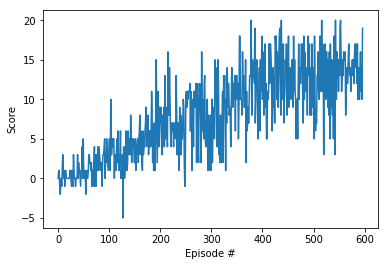

## Future Work
Few key extensions that I am working on but havent completed include the following:
1. Grid search for hyperparameters: Although the model developed reached the benchmark in a reasonable number of iterations, there are number of parameters that can have a significant impact on the performance. This includes (i) Epsilon value, (ii) Learning rate (iii) Tau value for soft update. I have create a grid search approach and create graphs as above to be able to compare the results.
2. Prioritized Replay: In the current implementation I have only used an experience buffer from which samples are drawn at equal probability. Having a prioritized buffer can be help in achieving better results.

3. Input states to be pixel based: Currently the model uses 37 variables that use a ray based perception of forward direction. A pixel based approach could generate a better view of the state of the environment and help the agent generate better strategies in the game. We can compare the two approaches to understand the benefit of more granular state information to the DQN model.

